In [ ]:
pip install -U spacy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import spacy
import wordcloud
import warnings
%matplotlib inline

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Medical_Insights_AI - June-2022.xlsx',header=[1])
df.head()

,CFM\nForm ID,Therapeutic Name,Interaction\nDate,Product\nName,Colleague\nRegion,Colleague\nCountry,Created\nDate,HCP\nCountry,HCP\nCustomer\nType,HCP\nSpeciality,DFO Description,DFO\nInsight,KIT\n(if available),KIT description,Insights\nCategory,Insights\ndescription,IDM,EM,NA,AMR/AMS Flag
0,138050,Hospital,2019-08-13,Dummy Product,Asia - EM,India,2019-09-01,India,Health Care Professional (Physician),NaN,there are 50-60% of cases that are resistant t...,Positive sentiment,Yes,Not Applicable,Resistance,Resistance to carbapenem,NaN,India,NaN,N
1,138051,Hospital,2019-08-13,Dummy Product,Asia - EM,India,2019-09-01,India,Health Care Professional (Physician),NaN,a lot of the use of the drug is being based o...,Positive sentiment,Yes,Establish the role of Zavicefta in documented ...,Targeted therapy,Use of Zavicefta as empirical therapy and not ...,NaN,India,NaN,N
2,138052,Hospital,2019-08-13,Dummy Product,Asia - EM,India,2019-09-01,India,Health Care Professional (Physician),NaN,Newer cases of resistance to colistin are also...,Positive sentiment,Yes,Not Applicable,Resistance,Resistance to colistin,NaN,India,NaN,N
3,138054,Hospital,2019-08-13,Dummy Product,Asia - EM,India,2019-09-01,India,Health Care Professional (Physician),NaN,more than 80% cases of carbapenem resistant ca...,Positive sentiment,Yes,Not Applicable,Resistance,Resistance to carbapenem,NaN,India,NaN,N
4,138055,Hospital,2019-08-13,Dummy Product,Asia - EM,India,2019-09-01,India,Health Care Professional (Physician),NaN,most common organism found is Klebsiella with ...,Positive sentiment,Yes,Not Applicable,Epidemiology,High incidence of Klebsiella with a mix of Kle...,NaN,India,NaN,N


In [3]:
df.tail()

,CFM\nForm ID,Therapeutic Name,Interaction\nDate,Product\nName,Colleague\nRegion,Colleague\nCountry,Created\nDate,HCP\nCountry,HCP\nCustomer\nType,HCP\nSpeciality,DFO Description,DFO\nInsight,KIT\n(if available),KIT description,Insights\nCategory,Insights\ndescription,IDM,EM,NA,AMR/AMS Flag
5977,KMI000141767,Hospital,2022-06-23,Dummy Product,IDM,DE,2022-06-26,NaN,NaN,NaN,Infections caused by multidrug-resistant gram-...,NaN,NaN,NaN,NaN,NaN,DE,NaN,NaN,N
5978,KMI000142256,Hospital,2022-06-24,Dummy Product,IDM,PL,2022-06-28,NaN,NaN,NaN,A clinical pharmacologist working in the inten...,NaN,NaN,NaN,NaN,NaN,PL,NaN,NaN,N
5979,KMI000142262,Hospital,2022-06-10,Dummy Product,IDM,PL,2022-06-28,NaN,NaN,NaN,A doctor working in the intensive care unit an...,NaN,NaN,NaN,NaN,NaN,PL,NaN,NaN,N
5980,KMI000142614,Hospital,2022-06-13,Dummy Product,IDM,ES,2022-06-29,NaN,NaN,NaN,In a discussion around the need for improv...,NaN,NaN,NaN,NaN,NaN,ES,NaN,NaN,N
5981,KMI000143040,Hospital,2022-06-13,Dummy Product,IDM,FR,2022-06-30,NaN,NaN,NaN,An HCP told me that in his hospital they are a...,NaN,NaN,NaN,NaN,NaN,FR,NaN,NaN,N


In [4]:
df.shape

(5982, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CFM
Form ID           5982 non-null   object        
 1   Therapeutic Name      5982 non-null   object        
 2   Interaction
Date      5982 non-null   datetime64[ns]
 3   Product
Name          5982 non-null   object        
 4   Colleague
Region      5982 non-null   object        
 5   Colleague
Country     5981 non-null   object        
 6   Created
Date          5982 non-null   datetime64[ns]
 7   HCP
Country           4635 non-null   object        
 8   HCP
Customer
Type     4635 non-null   object        
 9   HCP
Speciality        4365 non-null   object        
 10  DFO Description       5982 non-null   object        
 11  DFO
Insight           3044 non-null   object        
 12  KIT
(if available)    4777 non-null   object        
 13  KIT description   

In [6]:
df.columns

Index(['CFM\nForm ID', 'Therapeutic Name', 'Interaction\nDate',
       'Product\nName', 'Colleague\nRegion', 'Colleague\nCountry',
       'Created\nDate', 'HCP\nCountry', 'HCP\nCustomer\nType',
       'HCP\nSpeciality', 'DFO Description', 'DFO\nInsight',
       'KIT\n(if available)', 'KIT description', 'Insights\nCategory',
       'Insights\ndescription', 'IDM', 'EM', 'NA', 'AMR/AMS Flag'],
      dtype='object')

In [7]:
df.isnull().sum()

CFM\nForm ID                0
Therapeutic Name            0
Interaction\nDate           0
Product\nName               0
Colleague\nRegion           0
Colleague\nCountry          1
Created\nDate               0
HCP\nCountry             1347
HCP\nCustomer\nType      1347
HCP\nSpeciality          1617
DFO Description             0
DFO\nInsight             2938
KIT\n(if available)      1205
KIT description           264
Insights\nCategory        628
Insights\ndescription    2823
IDM                      2336
EM                       3649
NA                       5982
AMR/AMS Flag                0
dtype: int64

In [8]:
sentiment_df=df[['CFM\nForm ID','DFO Description','DFO\nInsight']]
sentiment_df.head()

,CFM\nForm ID,DFO Description,DFO\nInsight
0,138050,there are 50-60% of cases that are resistant t...,Positive sentiment
1,138051,a lot of the use of the drug is being based o...,Positive sentiment
2,138052,Newer cases of resistance to colistin are also...,Positive sentiment
3,138054,more than 80% cases of carbapenem resistant ca...,Positive sentiment
4,138055,most common organism found is Klebsiella with ...,Positive sentiment


In [9]:
sentiment_df.isnull().sum()

CFM\nForm ID          0
DFO Description       0
DFO\nInsight       2938
dtype: int64

In [10]:
sentiment_df.dropna(inplace=True)
sentiment_df

,CFM\nForm ID,DFO Description,DFO\nInsight
0,138050,there are 50-60% of cases that are resistant t...,Positive sentiment
1,138051,a lot of the use of the drug is being based o...,Positive sentiment
2,138052,Newer cases of resistance to colistin are also...,Positive sentiment
3,138054,more than 80% cases of carbapenem resistant ca...,Positive sentiment
4,138055,most common organism found is Klebsiella with ...,Positive sentiment
...,...,...,...
4627,398165,The doctor expressed his vision and prognosis ...,Neutral sentiment
4628,398296,"During the face-to-face presentation, it turne...",Positive sentiment
4629,398297,The intensive care specialist of the Brest Reg...,Positive sentiment
4631,398746,The ICU doctor reported that he is using a de-...,Neutral sentiment


In [11]:
sentiment_values=sentiment_df['DFO\nInsight'].value_counts()
sentiment_values

Neutral sentiment                                      1251
Positive sentiment                                      731
High priority                                           714
Negative sentiment                                      168
High priority;Positive sentiment                         61
High priority;Negative sentiment                         42
Neutral sentiment;Positive sentiment                     34
High priority;Neutral sentiment                          22
Neutral sentiment;Negative sentiment                     14
Neutral Sentiment                                         2
High Priority                                             1
Positive Sentiment                                        1
High priority;Positive sentiment;Negative sentiment       1
Positive sentiment;Negative sentiment                     1
Neutral sentiment;High priority                           1
Name: DFO\nInsight, dtype: int64

In [12]:
sentiment_df['DFO\nInsight']=sentiment_df['DFO\nInsight'].replace(['High priority;Positive sentiment',
                                                                   'Positive Sentiment',
                                                                   'Positive sentiment;Negative sentiment',
                                                                  'Neutral sentiment;Positive sentiment'],'Positive sentiment')
sentiment_df['DFO\nInsight'].value_counts()

Neutral sentiment                                      1251
Positive sentiment                                      828
High priority                                           714
Negative sentiment                                      168
High priority;Negative sentiment                         42
High priority;Neutral sentiment                          22
Neutral sentiment;Negative sentiment                     14
Neutral Sentiment                                         2
High Priority                                             1
High priority;Positive sentiment;Negative sentiment       1
Neutral sentiment;High priority                           1
Name: DFO\nInsight, dtype: int64

In [13]:
sentiment_df['DFO\nInsight']=sentiment_df['DFO\nInsight'].replace(['High priority;Neutral sentiment',
                                                                   'Neutral Sentiment',
                                                                   'Neutral sentiment;High priority'],'Neutral sentiment')
sentiment_df['DFO\nInsight'].value_counts()

Neutral sentiment                                      1276
Positive sentiment                                      828
High priority                                           714
Negative sentiment                                      168
High priority;Negative sentiment                         42
Neutral sentiment;Negative sentiment                     14
High Priority                                             1
High priority;Positive sentiment;Negative sentiment       1
Name: DFO\nInsight, dtype: int64

In [14]:
sentiment_df['DFO\nInsight']=sentiment_df['DFO\nInsight'].replace(['High priority;Negative sentiment',
                                                                   'Neutral sentiment;Negative sentiment',
                                                                   'Neutral sentiment;High priority'],'Negative sentiment')
sentiment_df['DFO\nInsight'].value_counts()

Neutral sentiment                                      1276
Positive sentiment                                      828
High priority                                           714
Negative sentiment                                      224
High Priority                                             1
High priority;Positive sentiment;Negative sentiment       1
Name: DFO\nInsight, dtype: int64

In [15]:
sentiment_df['DFO\nInsight']=sentiment_df['DFO\nInsight'].replace(['High priority;Positive sentiment;Negative sentiment',
                                                                   'High Priority'],'High priority')
new_sentiment_values=sentiment_df['DFO\nInsight'].value_counts()
new_sentiment_values

Neutral sentiment     1276
Positive sentiment     828
High priority          716
Negative sentiment     224
Name: DFO\nInsight, dtype: int64

In [16]:
new_sentiment_df=sentiment_df[sentiment_df['DFO\nInsight'].str.contains("High priority") == False]
new_sentiment_df

,CFM\nForm ID,DFO Description,DFO\nInsight
0,138050,there are 50-60% of cases that are resistant t...,Positive sentiment
1,138051,a lot of the use of the drug is being based o...,Positive sentiment
2,138052,Newer cases of resistance to colistin are also...,Positive sentiment
3,138054,more than 80% cases of carbapenem resistant ca...,Positive sentiment
4,138055,most common organism found is Klebsiella with ...,Positive sentiment
...,...,...,...
4626,398162,The doctor expressed his vision and prognosis ...,Neutral sentiment
4627,398165,The doctor expressed his vision and prognosis ...,Neutral sentiment
4628,398296,"During the face-to-face presentation, it turne...",Positive sentiment
4629,398297,The intensive care specialist of the Brest Reg...,Positive sentiment


In [17]:
new_sentiment_values=new_sentiment_df['DFO\nInsight'].value_counts()
new_sentiment_values

Neutral sentiment     1276
Positive sentiment     828
Negative sentiment     224
Name: DFO\nInsight, dtype: int64

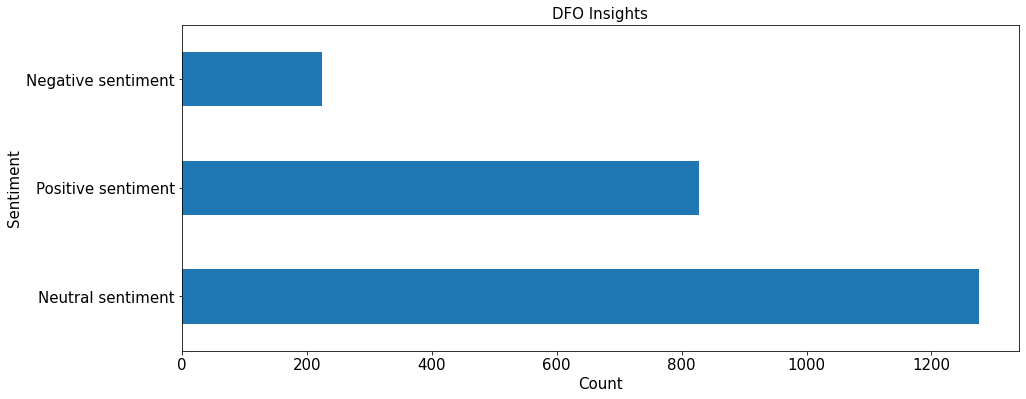

In [18]:
new_sentiment_values.plot(kind='barh',figsize=(15,6),fontsize=15)
plt.title('DFO Insights',fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.ylabel("Sentiment",fontsize=15)
plt.style.use('ggplot')

Text(0.5, 1.0, 'Insight Categories')

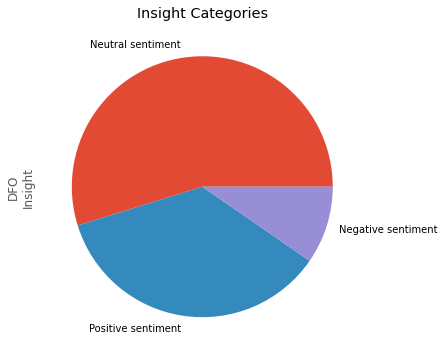

In [19]:
new_sentiment_values.plot(kind='pie',figsize=(15,6))
plt.title("Insight Categories")

**PREPROCESSING**

In [20]:
data=new_sentiment_df['DFO Description']
data

0       there are 50-60% of cases that are resistant t...
1       a lot of the use of  the drug is being based o...
2       Newer cases of resistance to colistin are also...
3       more than 80% cases of carbapenem resistant ca...
4       most common organism found is Klebsiella with ...
                              ...                        
4626    The doctor expressed his vision and prognosis ...
4627    The doctor expressed his vision and prognosis ...
4628    During the face-to-face presentation, it turne...
4629    The intensive care specialist of the Brest Reg...
4631    The ICU doctor reported that he is using a de-...
Name: DFO Description, Length: 2328, dtype: object

In [21]:
#function to remove symbols and punctuation
def data_clean(text):
    text_without_punc=[char for char in text if char not in string.punctuation]
    text_without_num=[char for char in text_without_punc if not char.isdigit()]
    text2 = ''.join(text_without_num)
    return text2

In [22]:
clean_data=data.apply(data_clean)
clean_data

0       there are  of cases that are resistant to carb...
1       a lot of the use of  the drug is being based o...
2       Newer cases of resistance to colistin are also...
3       more than  cases of carbapenem resistant cases...
4       most common organism found is Klebsiella with ...
                              ...                        
4626    The doctor expressed his vision and prognosis ...
4627    The doctor expressed his vision and prognosis ...
4628    During the facetoface presentation it turned o...
4629    The intensive care specialist of the Brest Reg...
4631    The ICU doctor reported that he is using a dee...
Name: DFO Description, Length: 2328, dtype: object

In [23]:
nlp=spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= {"the","in","patient","infection"}
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [24]:
#removing stopwords
all_stopwords = nlp.Defaults.stop_words
clean_data=clean_data.apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))
clean_data

0                              cases resistant carbapenem
1       lot use drug based physician discretion microb...
2                   Newer cases resistance colistin found
3          cases carbapenem resistant cases seen hospital
4       common organism found Klebsiella mix Klebsiell...
                              ...                        
4626    The doctor expressed vision prognosis followin...
4627    The doctor expressed vision prognosis followin...
4628    During facetoface presentation turned departme...
4629    The intensive care specialist Brest Regional H...
4631    The ICU doctor reported deescalation approach ...
Name: DFO Description, Length: 2328, dtype: object

In [25]:
all_stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [26]:
#tokenization and lemmatization
lemmatizer=nlp.get_pipe("lemmatizer")
print(lemmatizer.mode)

rule


In [27]:
lemmatized_data=clean_data.apply(lambda row: " ".join([token.lemma_ for token in nlp(row)]))
print(lemmatized_data)

0                               case resistant carbapenem
1       lot use drug base physician discretion microbi...
2                       new case resistance colistin find
3             case carbapenem resistant case see hospital
4       common organism find Klebsiella mix Klebsiella...
                              ...                        
4626    the doctor express vision prognosis follow for...
4627    the doctor express vision prognosis follow for...
4628    during facetoface presentation turn department...
4629    the intensive care specialist Brest Regional H...
4631    the ICU doctor report deescalation approach em...
Name: DFO Description, Length: 2328, dtype: object


In [28]:
new_sentiment_df['clean DFO']=lemmatized_data
new_sentiment_df.head()

,CFM\nForm ID,DFO Description,DFO\nInsight,clean DFO
0,138050,there are 50-60% of cases that are resistant t...,Positive sentiment,case resistant carbapenem
1,138051,a lot of the use of the drug is being based o...,Positive sentiment,lot use drug base physician discretion microbi...
2,138052,Newer cases of resistance to colistin are also...,Positive sentiment,new case resistance colistin find
3,138054,more than 80% cases of carbapenem resistant ca...,Positive sentiment,case carbapenem resistant case see hospital
4,138055,most common organism found is Klebsiella with ...,Positive sentiment,common organism find Klebsiella mix Klebsiella...


**EXPLORATORY DATA ANALYSIS**

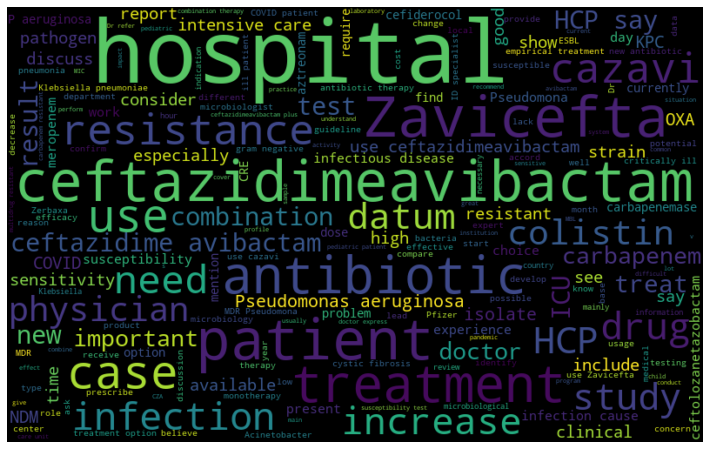

In [29]:
from wordcloud import WordCloud

all_words=" ".join([sentence for sentence in new_sentiment_df['clean DFO']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

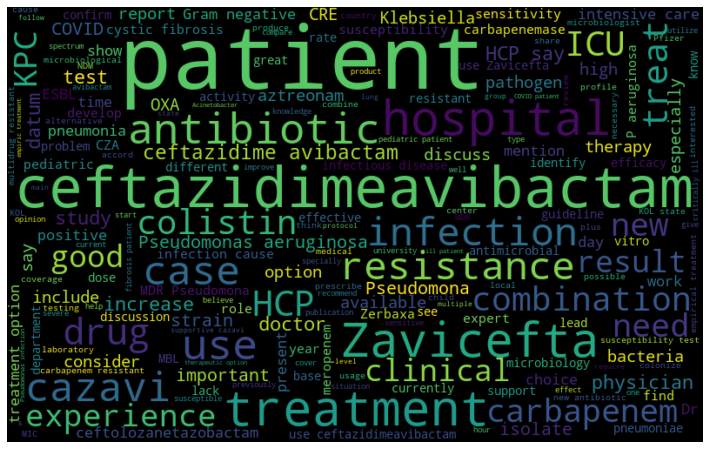

In [30]:
#positive words
positive_words=" ".join([sentence for sentence in new_sentiment_df['clean DFO'][new_sentiment_df['DFO\nInsight']=='Positive sentiment']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(positive_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

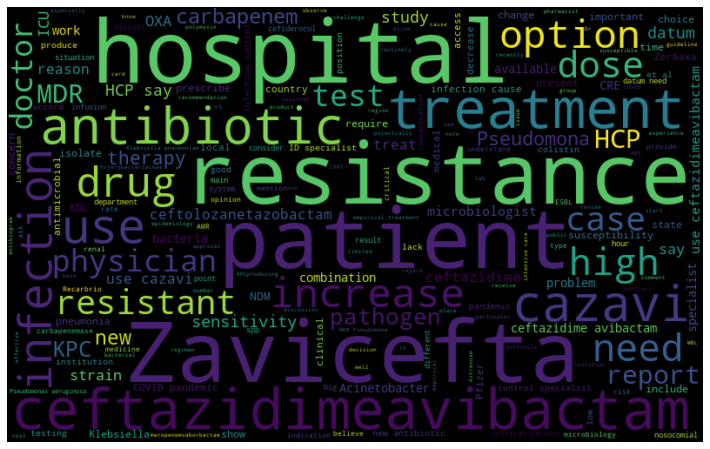

In [31]:
#negative words
negative_words=" ".join([sentence for sentence in new_sentiment_df['clean DFO'][new_sentiment_df['DFO\nInsight']=='Negative sentiment']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(negative_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

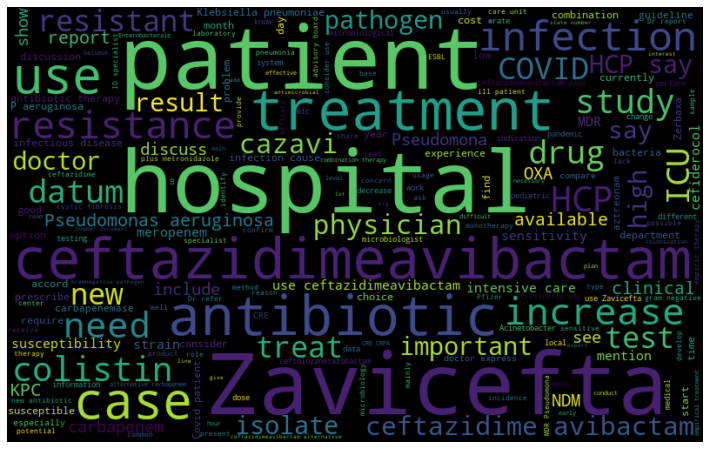

In [32]:
#neutral words
neutral_words=" ".join([sentence for sentence in new_sentiment_df['clean DFO'][new_sentiment_df['DFO\nInsight']=='Neutral sentiment']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(neutral_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
from collections import Counter

words = [lemmatized_data.apply(lambda x: nlp.tokenizer(x))]
words

[0                           (case, resistant, carbapenem)
 1       (lot, use, drug, base, physician, discretion, ...
 2                 (new, case, resistance, colistin, find)
 3       (case, carbapenem, resistant, case, see, hospi...
 4       (common, organism, find, Klebsiella, mix, Kleb...
                               ...                        
 4626    (the, doctor, express, vision, prognosis, foll...
 4627    (the, doctor, express, vision, prognosis, foll...
 4628    (during, facetoface, presentation, turn, depar...
 4629    (the, intensive, care, specialist, Brest, Regi...
 4631    (the, ICU, doctor, report, deescalation, appro...
 Name: DFO Description, Length: 2328, dtype: object]

In [34]:
from collections import Counter

# function for checking popular words:
def popular_words(series):
    temp_list = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp_list for item in sublist])
    temp = pd.DataFrame(top.most_common(25))
    temp.columns = ['words','count']
    return temp

common_words=popular_words(lemmatized_data)
common_words

,words,count
0,patient,972
1,the,786
2,infection,714
3,use,703
4,ceftazidimeavibactam,664
5,treatment,647
6,antibiotic,549
7,hospital,546
8,resistance,456
9,Zavicefta,414


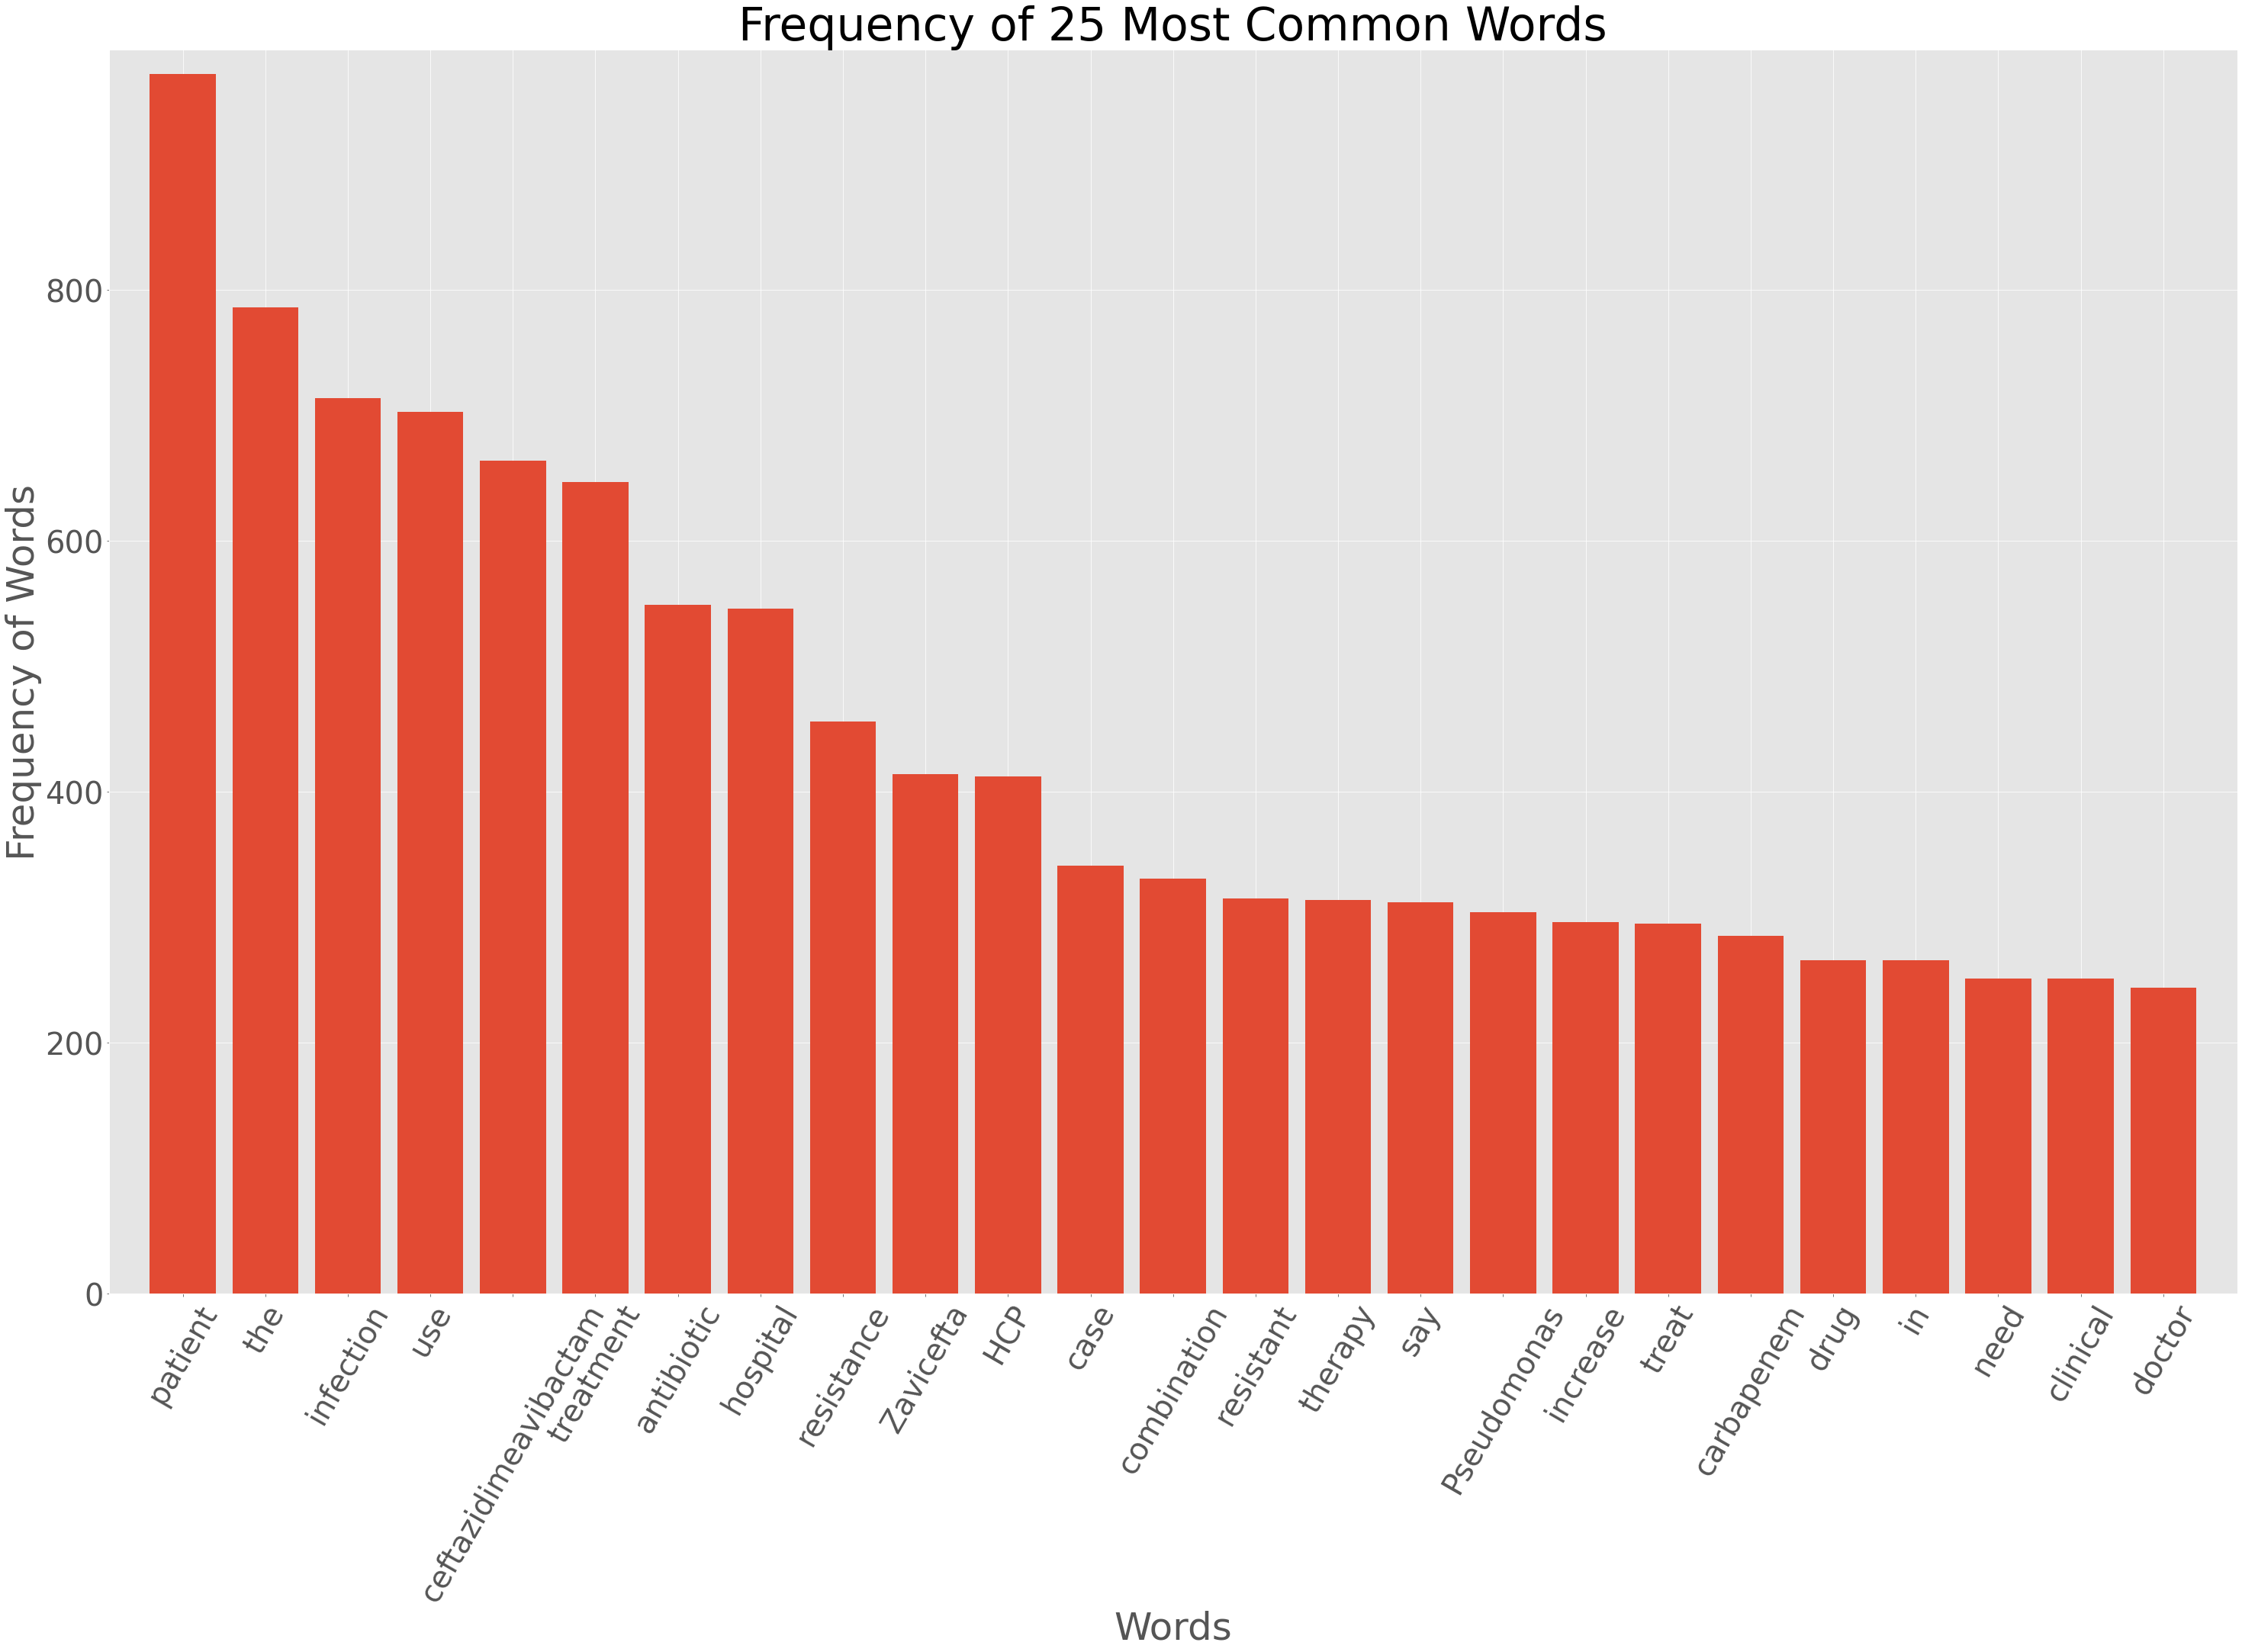

In [35]:
#graph for most common words
x=common_words['words']
y=common_words['count']

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [36]:
def convert_string(string):
    string_to_list=list(string.split(" "))
    string_to_df=pd.Series(string_to_list)
    return string_to_df

In [37]:
positive_df = convert_string(positive_words)
common_positive_words=popular_words(positive_df)
common_positive_words

,words,count
0,patient,353
1,infection,266
2,treatment,265
3,the,264
4,ceftazidimeavibactam,256
5,use,230
6,antibiotic,177
7,hospital,163
8,HCP,158
9,Zavicefta,149


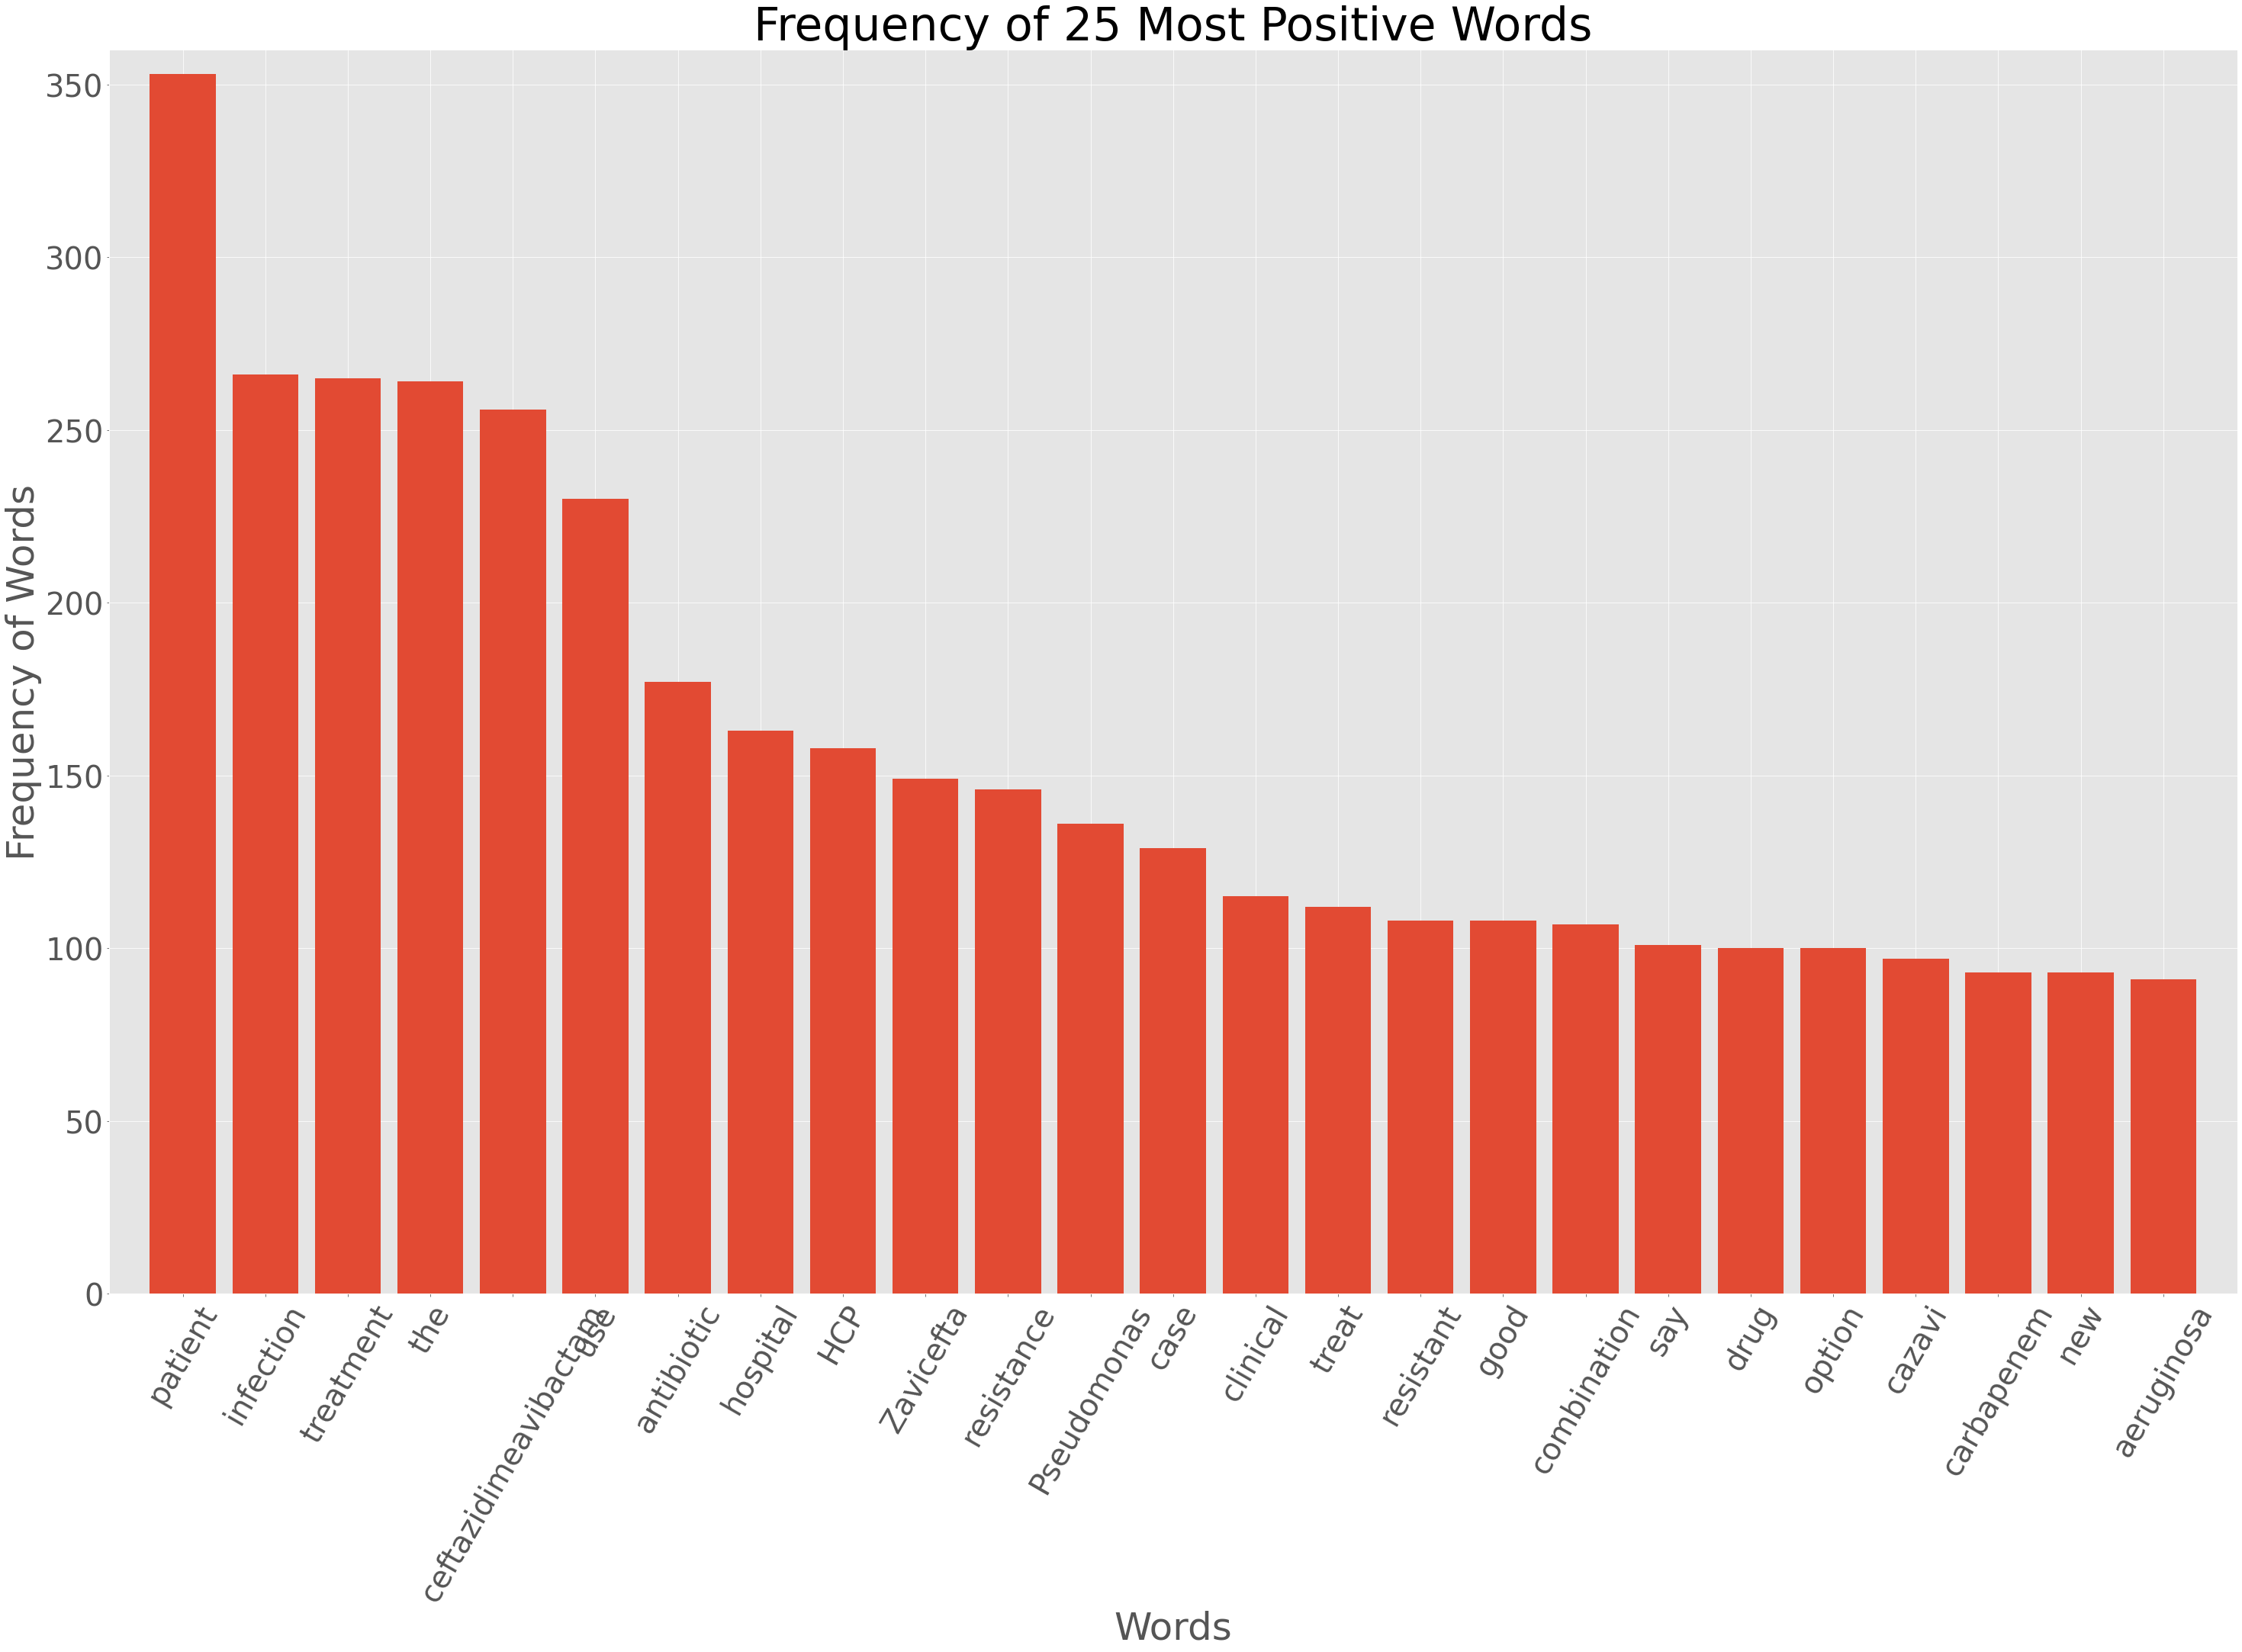

In [38]:
#graph for most common words
x=common_positive_words['words']
y=common_positive_words['count']

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Positive Words', fontsize=60)
plt.show()

In [39]:
negative_df = convert_string(negative_words)
common_negative_words=popular_words(negative_df)
common_negative_words

,words,count
0,patient,66
1,use,66
2,resistance,61
3,treatment,58
4,hospital,57
5,ceftazidimeavibactam,56
6,infection,52
7,antibiotic,50
8,the,48
9,cazavi,36


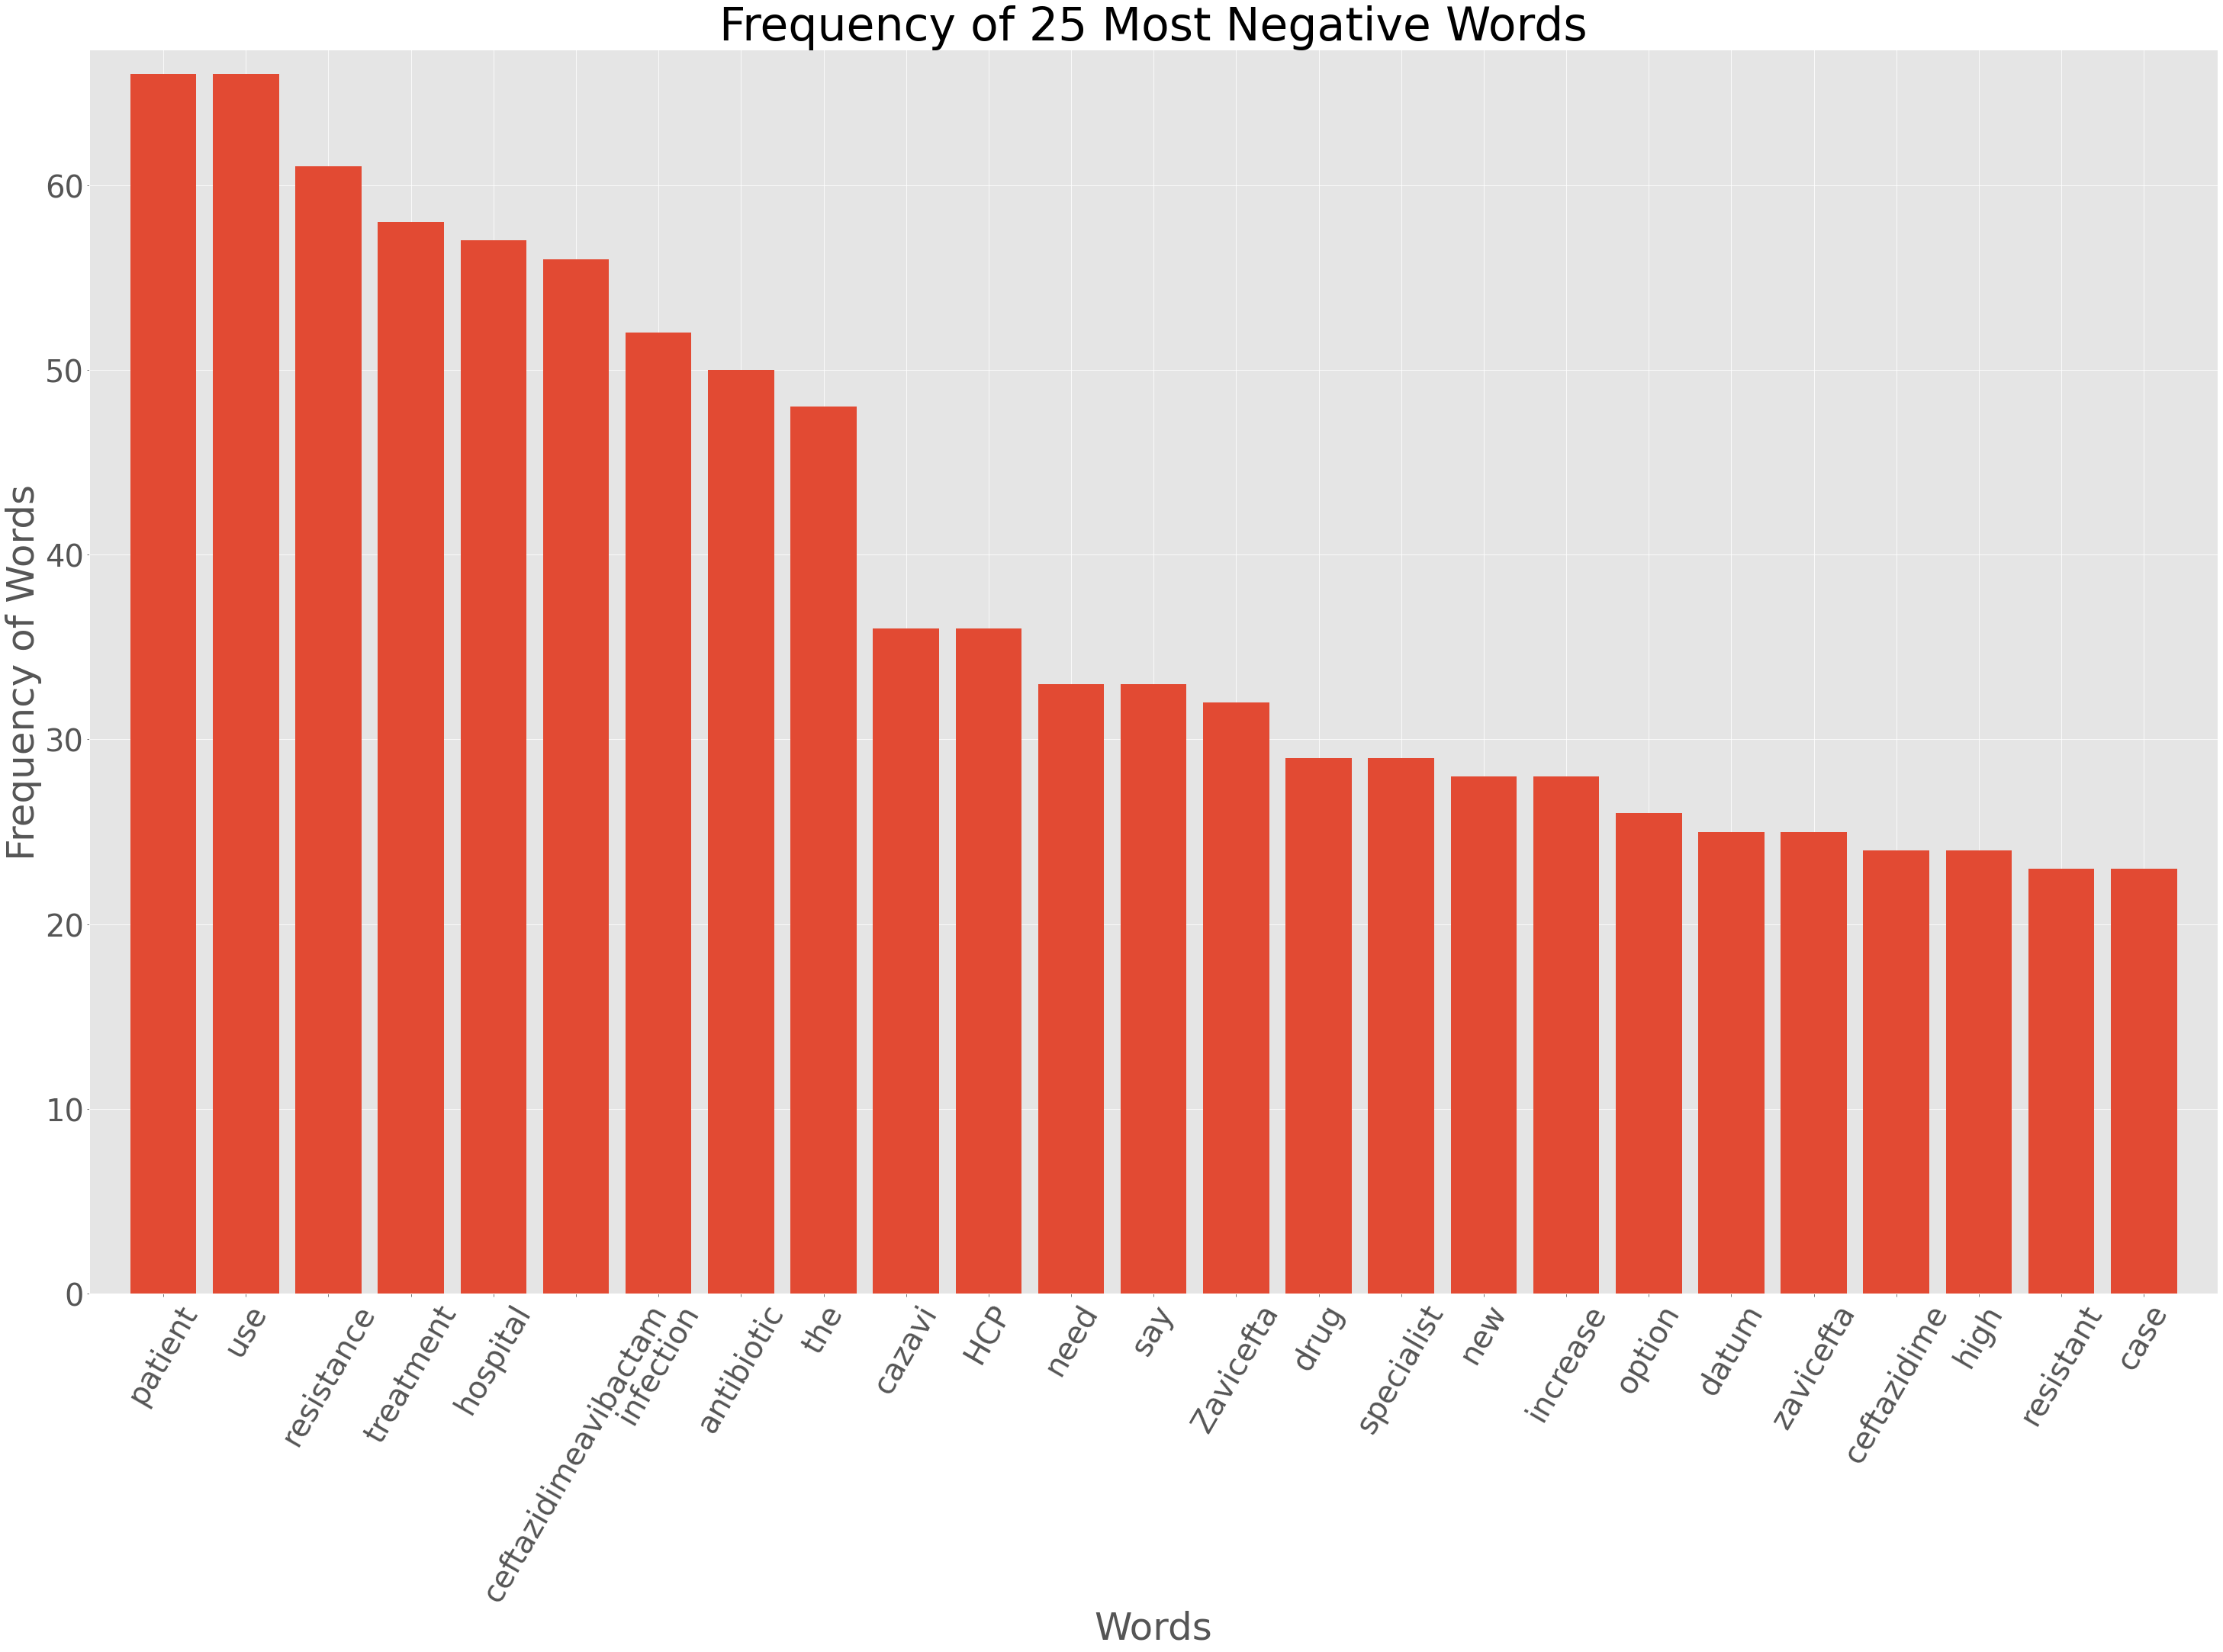

In [40]:
#graph for most common words
x=common_negative_words['words']
y=common_negative_words['count']

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Negative Words', fontsize=60)
plt.show()

In [41]:
neutral_df = convert_string(neutral_words)
common_neutral_words=popular_words(neutral_df)
common_neutral_words

,words,count
0,patient,553
1,the,474
2,use,407
3,infection,396
4,ceftazidimeavibactam,352
5,hospital,326
6,treatment,324
7,antibiotic,322
8,resistance,249
9,Zavicefta,233


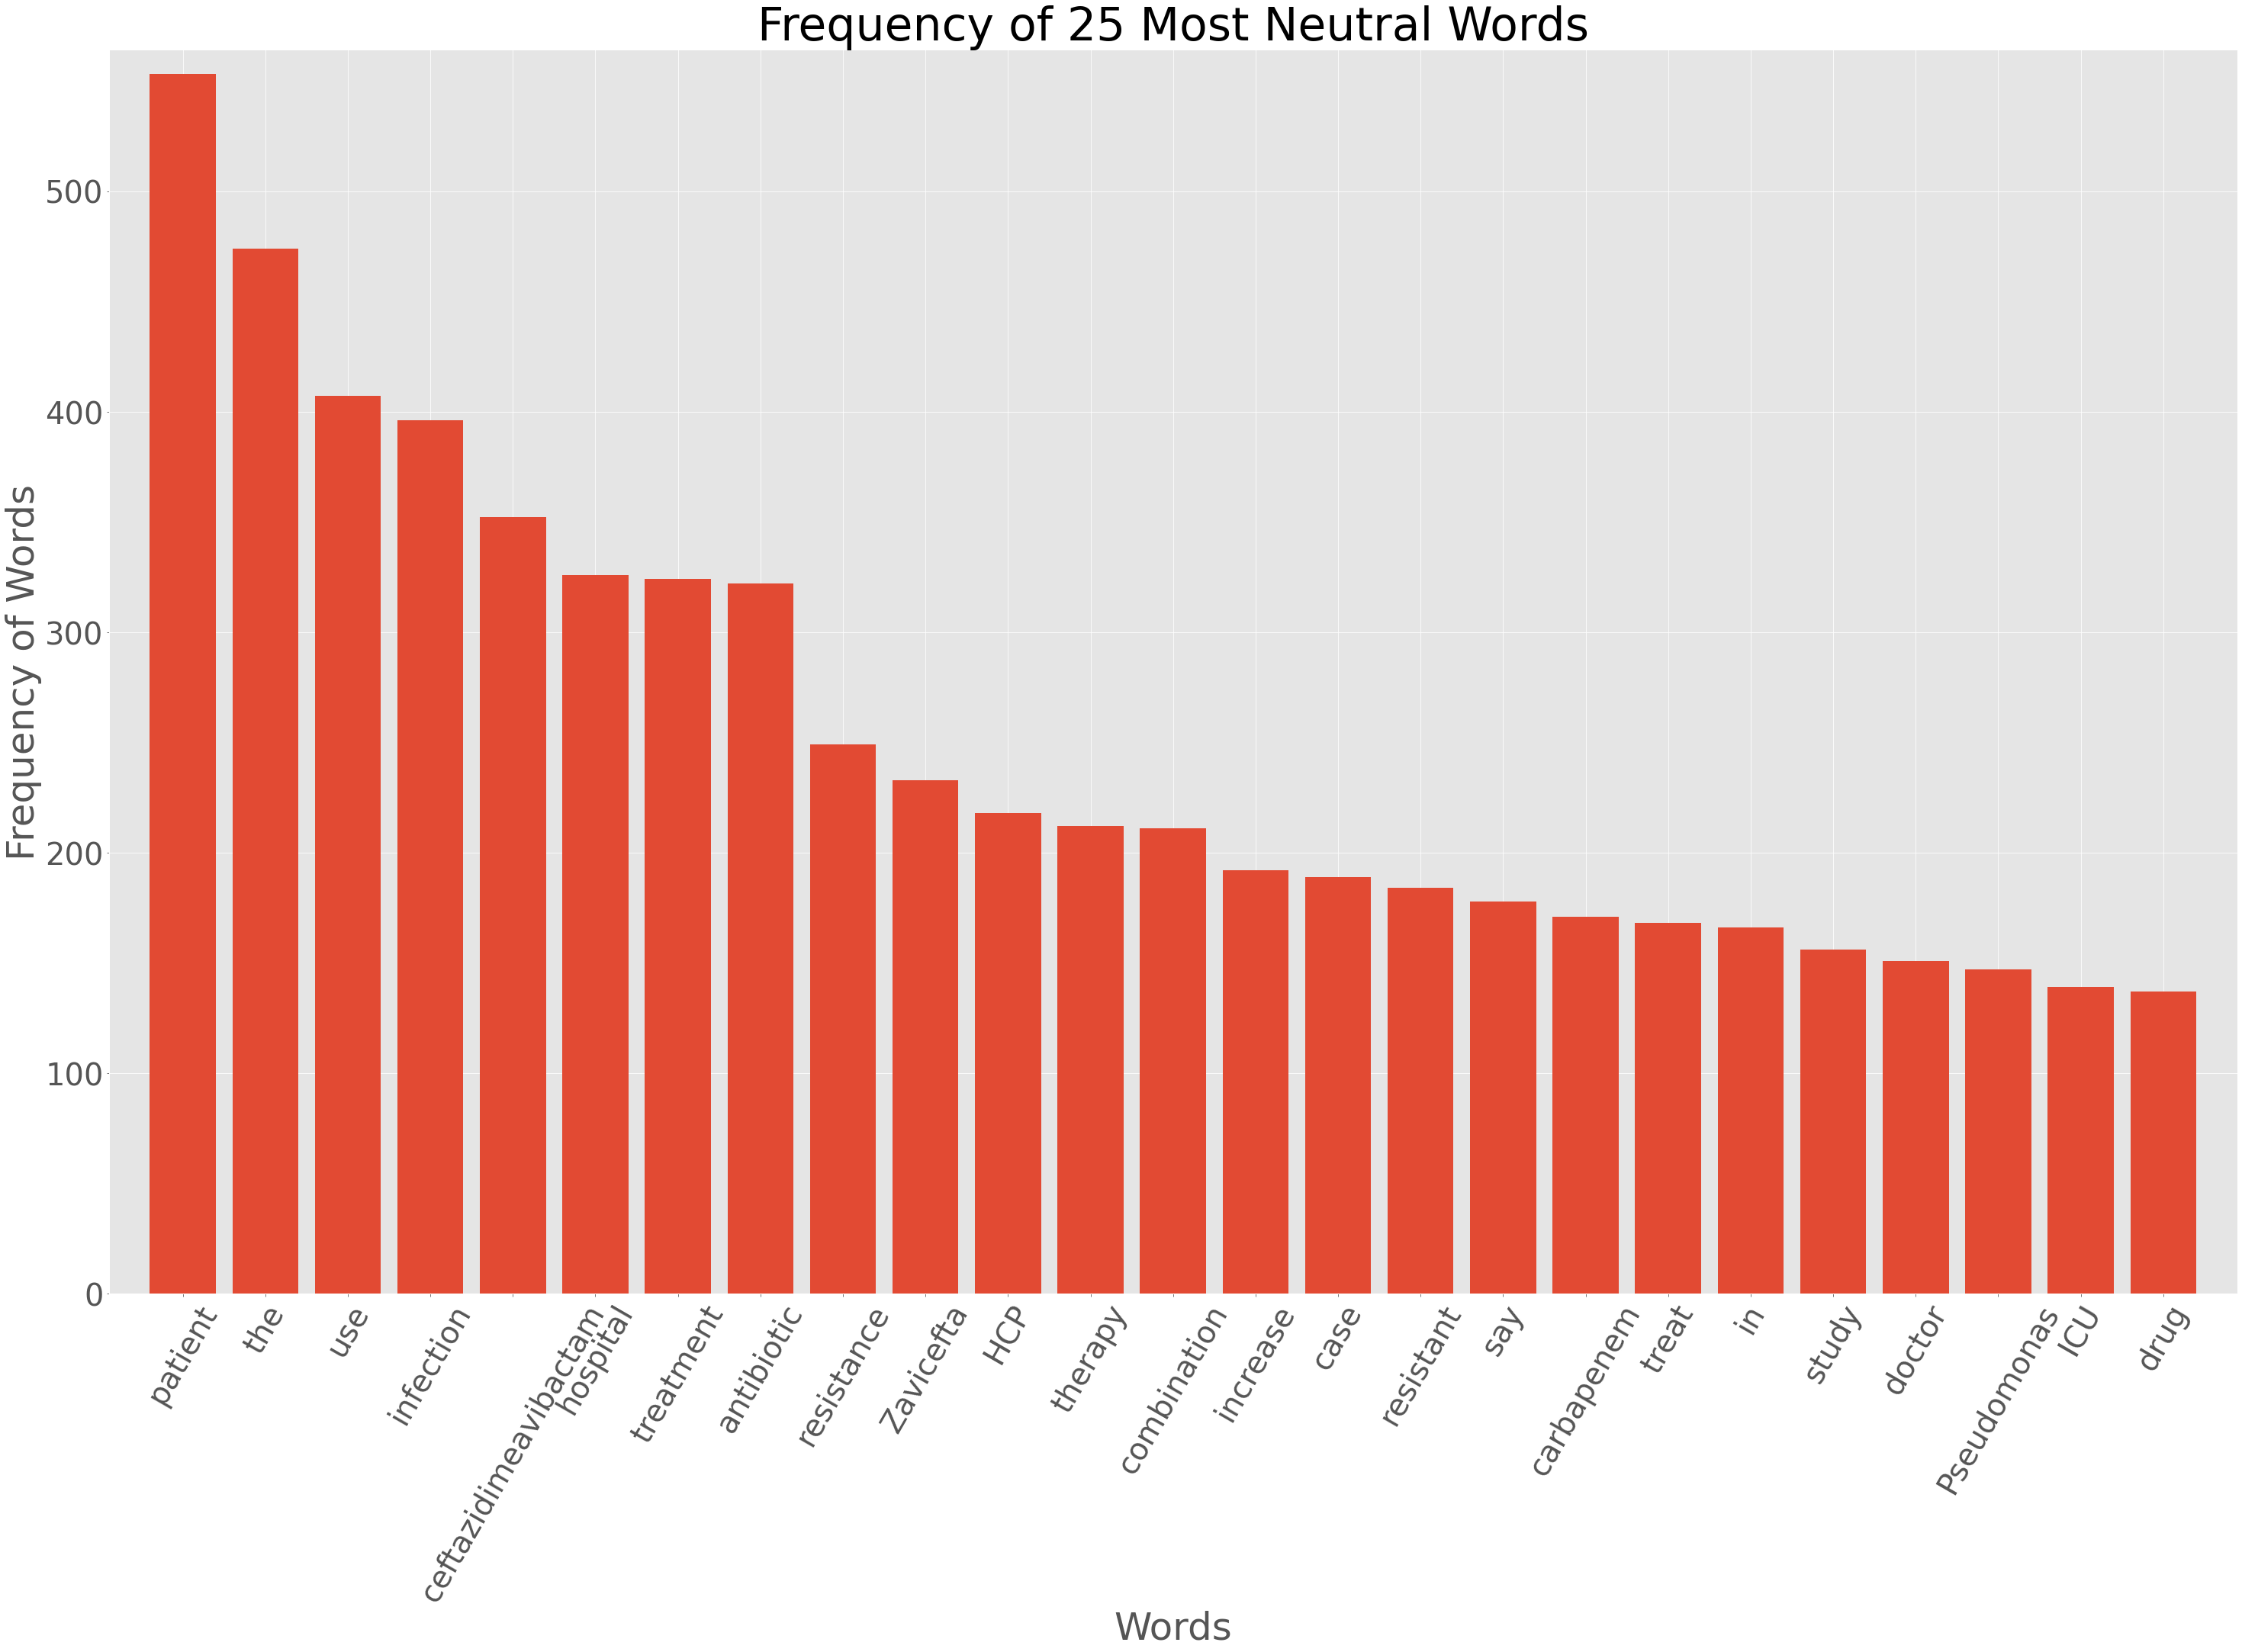

In [42]:
#graph for most common neutral words
x=common_neutral_words['words']
y=common_neutral_words['count']

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Neutral Words', fontsize=60)
plt.show()

**Features Extraction**

In [43]:
#features extraction using Tf-Idf vectorizer
vectorizer = TfidfVectorizer(analyzer='word', 
                             stop_words='english',
                             ngram_range=(1,2), 
                             max_df=0.75,
                             min_df=5, 
                             use_idf=True, 
                             smooth_idf=True,
                             sublinear_tf=True, 
                             max_features=1000)

tfIdfMat  = vectorizer.fit_transform(new_sentiment_df['clean DFO'])
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)

['ab', 'able', 'absence', 'academic', 'access', 'accord', 'accord hcp', 'according', 'according hcp', 'acinetobacter', 'acinetobacter baumannii', 'action', 'active', 'activity', 'add', 'addition', 'additional', 'additionally', 'additionally director', 'adjustment', 'administer', 'administration', 'admit', 'adult', 'advantage', 'advisory', 'advisory board', 'aeruginosa', 'aeruginosa infection', 'affect', 'age', 'agent', 'agree', 'al', 'allow', 'alternative', 'alternative carbapenem', 'amikacin', 'aminoglycoside', 'ampc', 'amr', 'ams', 'anaerobe', 'analysis', 'analyze', 'andor', 'answer', 'antibacterial', 'antibacterial drug', 'antibacterial therapy', 'antibiogram', 'antibiotic', 'antibiotic combination', 'antibiotic resistance', 'antibiotic therapy', 'antibiotic treatment', 'antibiotics', 'antimicrobial', 'antimicrobial resistance', 'antimicrobial stewardship', 'antimicrobial susceptibility', 'antimicrobial therapy', 'appear', 'apply', 'approach', 'appropriate', 'approval', 'approve', '

In [44]:
tfIdfMat

<2328x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 41937 stored elements in Compressed Sparse Row format>

In [45]:
tfIdfMat_reduced=tfIdfMat.toarray()
tfIdfMat_reduced

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Train Test Split**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, new_sentiment_df['DFO\nInsight'], random_state=42, test_size=0.30)

**Model Training**

In [47]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
accuracy_score(pred,y_test)

0.6280400572246065

In [50]:
confusion_matrix(y_test,pred)

array([[  2,  50,  17],
       [  2, 322,  63],
       [  0, 128, 115]], dtype=int64)

In [358]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [359]:
pred=model_rf.predict(X_test)
accuracy_score(pred,y_test)

0.586552217453505

In [360]:
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [361]:
pred=model_svc.predict(X_test)
accuracy_score(pred,y_test)

0.6108726752503576

In [51]:
#save the model
import pickle
pickle.dump(model, open('lrmodel.pkl', 'wb'))

**Features extraction using bow**

In [288]:
bow_vectorizer=CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(new_sentiment_df['clean DFO'])

In [289]:
bow

<2328x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 38645 stored elements in Compressed Sparse Row format>

In [290]:
X_train, X_test, y_train, y_test = train_test_split(bow, new_sentiment_df['DFO\nInsight'], random_state=42, test_size=0.30)

In [291]:
model_bow=LogisticRegression()
model_bow.fit(X_train,y_train)

LogisticRegression()

In [293]:
pred=model_bow.predict(X_test)
accuracy_score(pred,y_test)

0.6080114449213162

In [181]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [182]:
pred=model.predict(X_test)
accuracy_score(pred,y_test)

0.6065808297567954

**Using Word2Vec**

In [ ]:
import gensim
SIZE=50

clean_wordlist = [lemmatized_data.apply(lambda x: nlp.tokenizer(x))]

w2v_model = gensim.models.Word2Vec(clean_wordlist,
                                  min_count=1,
                                  window=5,
                                  workers=4)

w2v_model

Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Users\riyab\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\riyab\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\riyab\anaconda3\lib\site-packages\gensim\models\word2vec.py", line 1163, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, alpha, thread_private_mem)
  File "C:\Users\riyab\anaconda3\lib\site-packages\gensim\models\word2vec.py", line 954, in _do_train_job
    tally += train_batch_cbow(self, sentences, alpha, work, neu1, self.compute_loss)
  File "gensim\models\word2vec_inner.pyx", line 642, in gensim.models.word2vec_inner.train_batch_cbow
  File "C:\Users\riyab\anaconda3\lib\site-packages\pandas\core\generic.py", line 1442, in __nonzero__
    raise ValueError(
ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
